In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Perceptron:
    
    # runs every time you create perceptron
    def __init__(self, num_inputs):
        self.weights = []
        self.num_inputs = num_inputs
        
        # initialize weights randomly
        for _ in range(0, num_inputs):
            self.weights.append(random.random()*2-1)
        print('Initial weights {}'.format(self.weights))
        
    # mult & activation
    def feed_forward(self, inputs):
        self.inputs = inputs
        sum = 0
        for i in range(0, self.num_inputs):
            sum += self.weights[i] * inputs[i]
            
        self.output = self.activation(sum)
        return self.output
    
    def activation(self, x):
        if x >= 0:
            return 1
        return 0
    
    # subtract the error multiplied by lr
    def backward_pass(self, error):
        learning_rate = 0.01
        for i in range(0, self.num_inputs):
            self.weights[i] -= error * self.inputs[i] * learning_rate
            
    def get_weights(self):
        return self.weights

In [9]:
def line(x):
    return 0.5*x + 500

def graph(formula, weights = []):
    
    plt.figure()
    x = np.array(range(0, 1000))
    y = formula(x)
    plt.plot(x,y)
    
    # without bias
    if len(weights) == 2:
        y2 = (-weights[0] / weights[1]) * x
        plt.plot(x, y2)
        
    # with bias
    if len(weights) == 3:
        y2 = (-weights[0] / weights[1]) * x - (weights[2] / weights[1])
        plt.plot(x, y2)
            
    plt.xlim(0, 1000)
    plt.ylim(0, 1000)
    plt.show()

Initial weights [0.703526863723418, -0.04338470460578425, 0.24921434956477717]


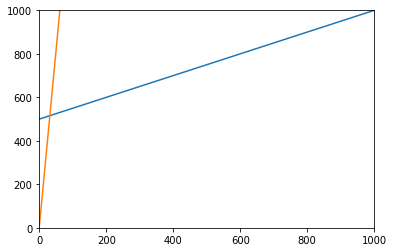

Final weights [-18.368912714563827, 16.939993449441175, -615.9507856500201]


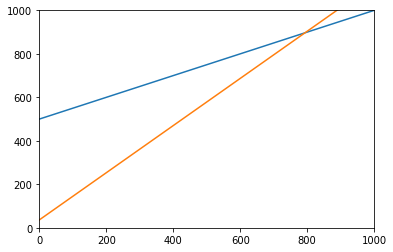

In [11]:
p = Perceptron(3)
graph(line, p.get_weights())

# training with bias
for _ in range(0, 1000000):
    x_coord = random.random() * 1000
    y_coord = random.random() * 1000
    line_y = line(x_coord)
    
    if y_coord > line_y:
        answer = 1
    else:
        answer = 0
    
    guess = p.feed_forward([x_coord, y_coord, 1])
    p.backward_pass(guess - answer)
    
print('Final weights {}'.format(p.get_weights()))
graph(line, p.get_weights())

# Why it's training so slow:
Because we didn't normalize the input.

See backward_pass(): the first 2 inputs are 500 on avg but the third is always 1